In [100]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [101]:
df = pd.read_csv('/Users/arturmkrtchyan/Desktop/Data visualization/weather-check.csv')


In [102]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


### Data Processing

In [103]:
question_description = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
region_description = 'US Region'

df[region_description] = df[region_description].str.strip().replace('-', np.nan)
df[question_description] = df[question_description].str.strip().replace('-', np.nan)
df.dropna(subset=[region_description,question_description], inplace=True)

## Absolute values

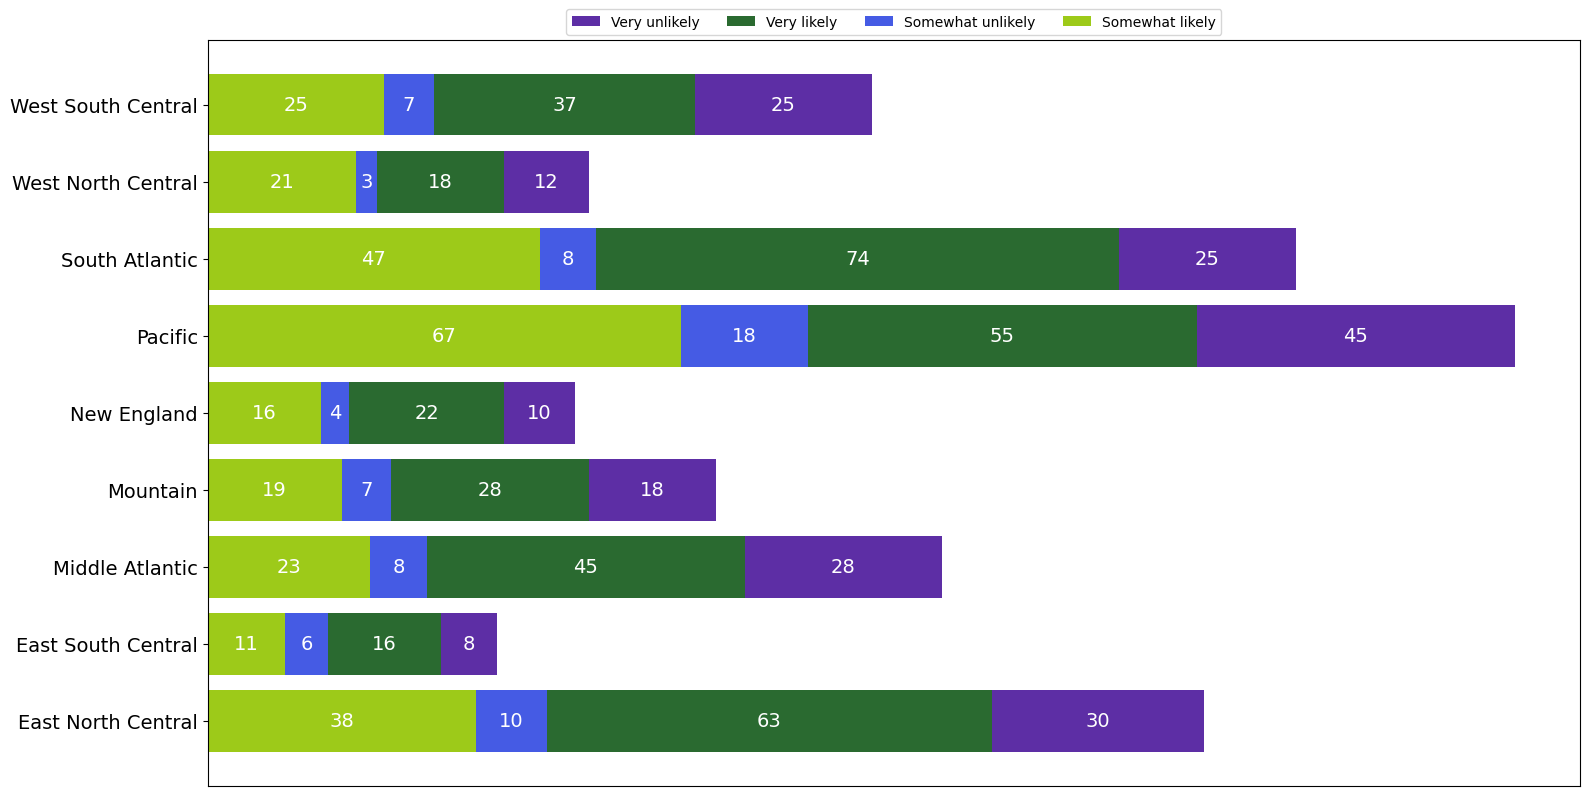

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

absolute_chart = df.groupby([region_description, question_description]).size().unstack()


plt.figure(figsize=(16,8))
left = np.zeros(len(absolute_chart))

n_colors = len(absolute_chart.columns)
custom_colors = [(random.random(), random.random(), random.random()) for _ in range(n_colors)]

for idx, answer in enumerate(absolute_chart.columns):
    bars = plt.barh(absolute_chart.index, absolute_chart[answer], left=left, color=custom_colors[idx], label=answer)
    left += absolute_chart[answer]

    for bar, count in zip(bars, absolute_chart[answer]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{count}', ha='center', va='center', color='white',fontsize=14)

plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(absolute_chart.columns))


plt.tight_layout()
plt.show()

# Sum up to 100

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import random
def graph():
    chart_to_100 = df.groupby(region_description)[question_description].value_counts(normalize=True).unstack().fillna(0) * 100

    plt.figure(figsize=(18, 6))

    n_colors = len(chart_to_100.columns)
    custom_colors = [(random.random(), random.random(), random.random()) for _ in range(n_colors)]

    bars = chart_to_100.plot(kind='barh', stacked=True, color=custom_colors, edgecolor='white',figsize=(15, 6))

    for i, reg in enumerate(chart_to_100.index):
        x_position = 0
        for question, color in zip(chart_to_100.columns, colors):
            width = chart_to_100.loc[reg, question]
            plt.text(x_position + (width / 3) , i, f'{width:.1f}%', ha='left', va='center', fontsize=12, color='black')
            x_position += width

    plt.xlim(0, 100)
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=len(chart_to_100.columns))
    plt.tight_layout()
    plt.show()

In [21]:
import time
from IPython.display import display, clear_output

def periodic_execution():
    start_time = time.time()
    while (time.time() - start_time) < 60:  # Run for 1 minute
        graph()
        clear_output(wait=True)
        time.sleep(1)

<Figure size 1800x600 with 0 Axes>

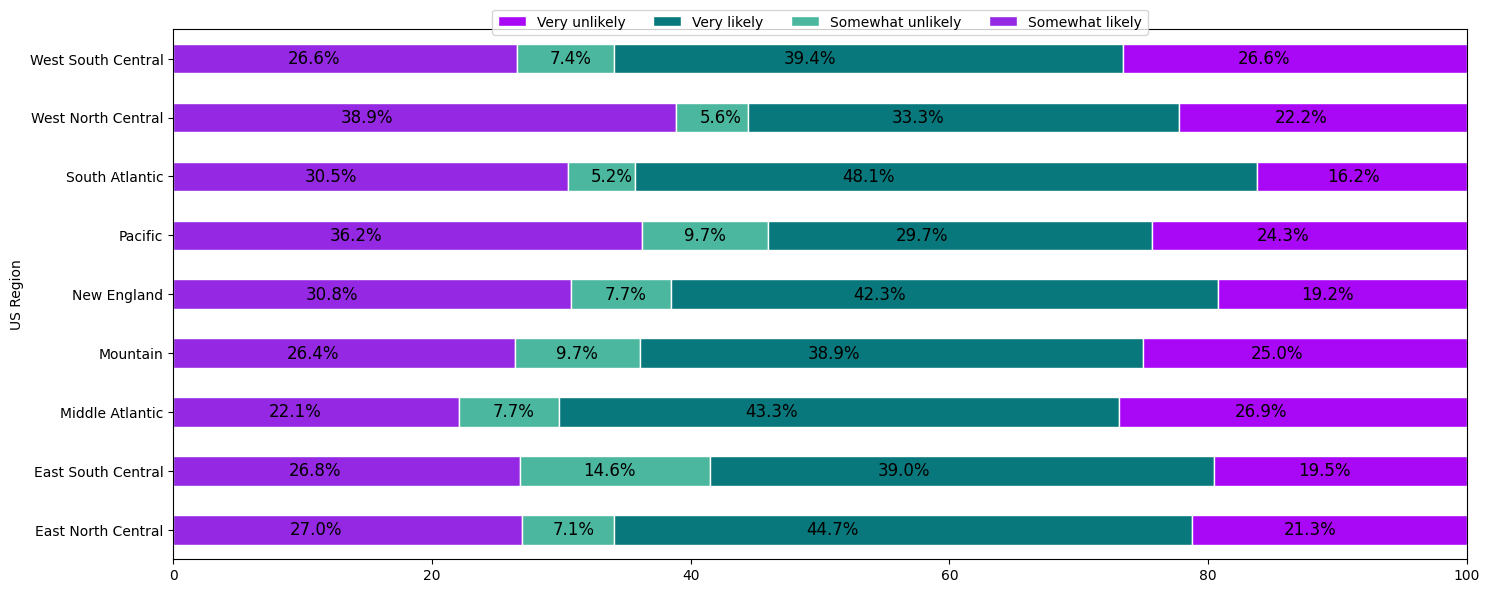

In [97]:
#Some Funny code
periodic_execution()

<Figure size 1800x600 with 0 Axes>

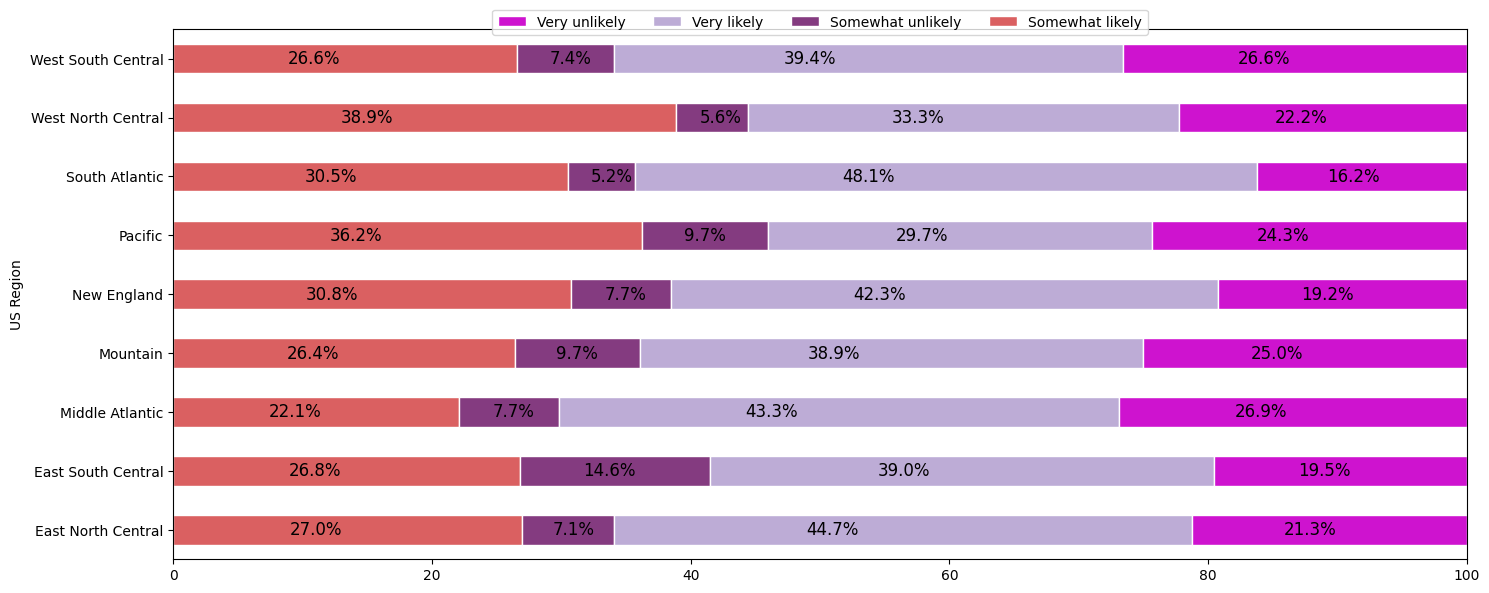

In [108]:
graph()